<a href="https://colab.research.google.com/github/swarnygora/BME3053C-Spring-2025/blob/main/lessons-solved/06_Matrix_Transformations_03_05_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BME3053C - Computer Applications for BME

<br/>

<h1 align="center">Matrix Transformations</h1>

---

<center><h2>Lesson 06</h2></center>

### Original Lesson Link: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/uf-bme/BME3053C-Spring-2025/blob/main/lessons/06_Matrix_Transformations.ipynb)


# Introduction to Matrix Transformations

Matrix transformations are fundamental operations in linear algebra that have numerous applications in biomedical engineering. They allow us to manipulate and analyze multidimensional data, which is crucial in fields such as medical imaging, biomechanics, and signal processing.

In this lesson, we'll explore how to perform matrix transformations using Python's NumPy library and apply these concepts to biomedical engineering problems.


## Importing Required Libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

# Basic Matrix Operations

 Before diving into transformations, let's review some basic matrix operations:

 * Matrix Addition: $\begin{bmatrix} a & b \\ c & d \end{bmatrix} + \begin{bmatrix} e & f \\ g & h \end{bmatrix} = \begin{bmatrix} a+e & b+f \\ c+g & d+h \end{bmatrix}$

 * Matrix Multiplication: $\begin{bmatrix} a & b \\ c & d \end{bmatrix} \times \begin{bmatrix} e & f \\ g & h \end{bmatrix} = \begin{bmatrix} ae+bg & af+bh \\ ce+dg & cf+dh \end{bmatrix}$

 * Scalar Multiplication: $k \begin{bmatrix} a & b \\ c & d \end{bmatrix} = \begin{bmatrix} ka & kb \\ kc & kd \end{bmatrix}$

 * Matrix Transposition: $\begin{bmatrix} a & b \\ c & d \end{bmatrix}^T = \begin{bmatrix} a & c \\ b & d \end{bmatrix}$

 * Identity Matrix: $I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$


# Examples of Matrix Transformations

Here are some common matrix transformations used to transform points:

 1. Translation: $\begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix}$

 2. Scaling: $\begin{bmatrix} s_x & 0 \\ 0 & s_y \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} x' \\ y' \end{bmatrix}$

 3. Rotation (by angle θ): $\begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} x' \\ y' \end{bmatrix}$

 4. Shear (horizontal): $\begin{bmatrix}1&k\\0&1\end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}x'\\y'\end{bmatrix}$

  5. Reflection(about y-axis): $\begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} x' \\ y' \end{bmatrix}$

These transformations can be combined by multiplying their respective matrices to create more complex transformations.


# Implementing Matrix Operations

In the following cells, we'll implement and demonstrate some basic matrix operations using NumPy. These operations form the foundation for more complex transformations we'll explore later.

We'll start by creating two matrices, A and B, and then perform addition and multiplication operations on them. This will help us understand how these operations work in practice and prepare us for applying them in more advanced scenarios, such as image transformations in medical imaging.


In [3]:
# Creating matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)

# Matrix addition
print("\nA + B:")
print(A + B)

# Matrix multiplication
print("\nA * B:")
print(np.dot(A, B))
print("\nAnother way to multiply matrices using the @ operator:")
print(A @ B)
print("\nChanging order")
print(B @ A)

# Scalar multiplication
print("\n2 * A:")
print(2 * A)

# Matrix transposition
print("\nTranspose of A:")
print(A.T)

Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[5 6]
 [7 8]]

A + B:
[[ 6  8]
 [10 12]]

A * B:
[[19 22]
 [43 50]]

Another way to multiply matrices using the @ operator:
[[19 22]
 [43 50]]

Changing order
[[23 34]
 [31 46]]

2 * A:
[[2 4]
 [6 8]]

Transpose of A:
[[1 3]
 [2 4]]


## Translation

  Translation moves points by a fixed distance in a given direction. In 2D, we can represent this using a 3x3 matrix:
  
  * Inverse translation: To undo a translation, we can apply the negative of the original translation.
    * For example, if we translated by (tx, ty), the inverse translation would be (-tx, -ty).

  

Original point: [-1 -3]
Transformed point: [1 0]


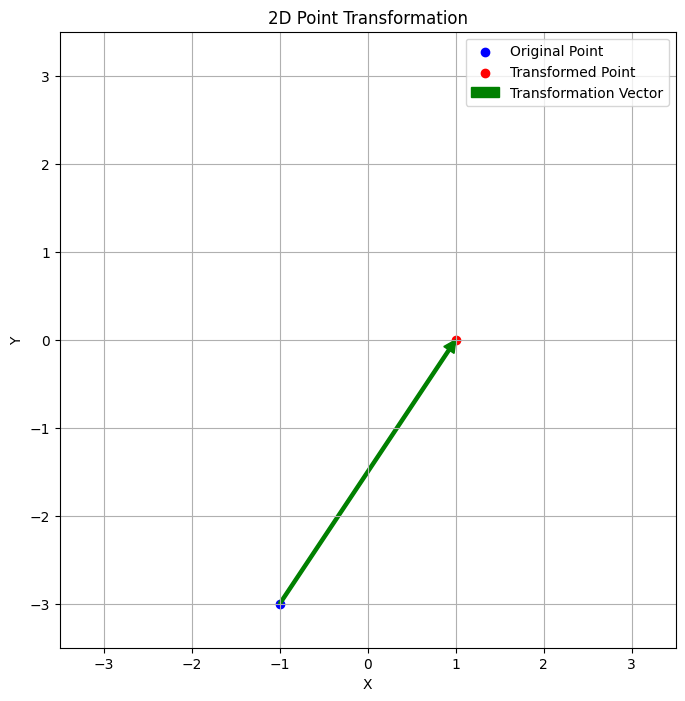

In [16]:
def translate(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])


# Example: Translate a point (1, 2) by (3, 4)
point = np.array([-1,-3])
translation = translate(2,3)
# Convert point to homogeneous coordinates
homogeneous_point = np.append(point, 1)

# Apply translation
new_point = (translation @ homogeneous_point)[:2]

def visualize_transformation(point, new_point):
    print("Original point:", point)
    print("Transformed point:", new_point)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(point[0], point[1], color='blue', label='Original Point')
    ax.scatter(new_point[0], new_point[1], color='red', label='Transformed Point')

    # Calculate plot limits
    max_range = np.max(np.abs([*point,*new_point]))+0.5
    ax.set_xlim(-max_range, max_range)
    ax.set_ylim(-max_range, max_range)

    plot_width = max_range*2
    plot_height = max_range*2
    # Calculate arrow properties proportional to plot size
    arrow_width = 0.005 * plot_width  # Increased arrow width
    head_width = 0.02 * plot_width     # Increased head width
    head_length = 0.02 * plot_height    # Increased head length

    ax.arrow(point[0], point[1], new_point[0]-point[0], new_point[1]-point[1],
             color='green', width=arrow_width, head_width=head_width, head_length=head_length,
             length_includes_head=True, label='Transformation Vector')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('2D Point Transformation')
    ax.legend()
    ax.grid(True)
    ax.set_aspect('equal')
    plt.show()



# Call the function with the original and translated points
visualize_transformation(point, new_point)

## Exercise: Translate a point
In this exercise, we'll apply our knowledge of matrix transformations to translate a point.

Objectives:
1. Create a point centered at (3,4)
2. Translate the point 4 units down.


Original point: [3 4]
Transformed point: [6 6]


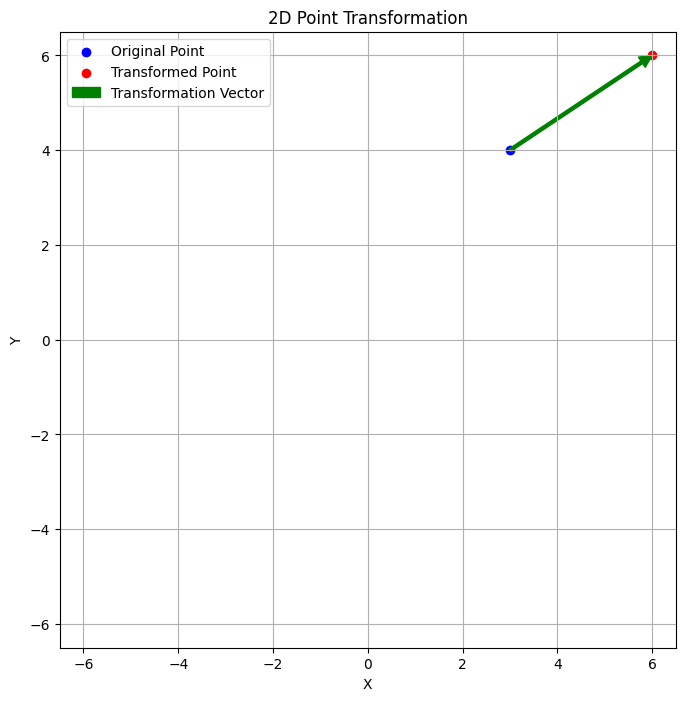

In [17]:
point = np.array([3,4])

translation = translate(3,2)

homogeneous_point = np.append(point, 1)

new_point = (translation @ homogeneous_point)[:2]
visualize_transformation(point, new_point)

## Scaling

Scaling changes the size of an object. In 2D, we can represent this using a 2x2 matrix:


Original point: [2 3]
Transformed point: [4.  1.5]


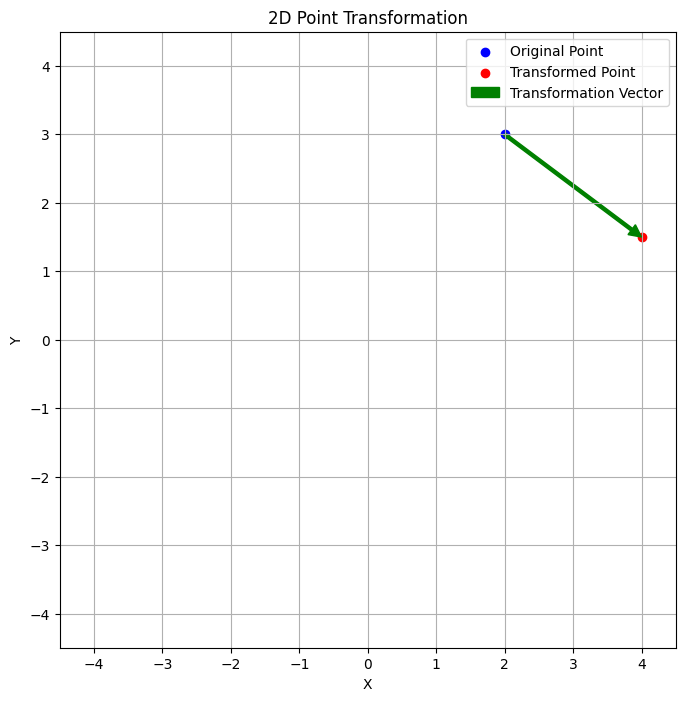

In [18]:
def scale_2d(sx, sy):
    return np.array([
        [sx, 0],
        [0, sy]
    ])

# Example: Scale a point (2, 3) by factors of 2 and 0.5
point = np.array([2, 3])
scaling = scale_2d(2, 0.5)
new_point = np.dot(scaling, point)

visualize_transformation(point, new_point)

## Rotation

Rotation turns an object around a fixed point. In 2D, we can represent this using a 2x2 matrix:
Key points about matrix rotations:
* The rotation matrix for a counterclockwise rotation by angle θ is:
$\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}$

* Rotation preserves the distance from the origin and the shape of the object.

* Consecutive rotations can be combined by multiplying their matrices.

 * The inverse of a rotation matrix is its transpose, making it easy to undo rotations.
    For a rotation matrix R(θ):
    \begin{align}R(\theta)^{-1} = R(\theta)^T = R(-\theta) =
    \begin{bmatrix}\cos(\theta) & \sin(\theta)\\-\sin(\theta) & \cos(\theta)\end{bmatrix}\end{align}

* In 3D, rotations become more complex and can be represented using 3x3 matrices or other methods like quaternions.


Original point: [1 0]
Transformed point: [6.123234e-17 1.000000e+00]


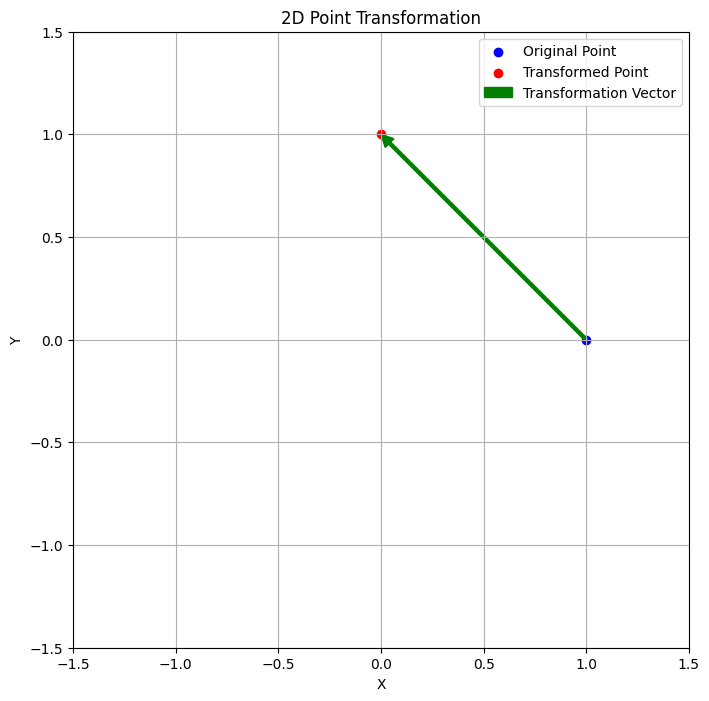

In [19]:
def rotate_2d(angle_degrees):
    angle_radians = np.radians(angle_degrees)
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)
    return np.array([
        [cos_theta, -sin_theta],
        [sin_theta, cos_theta]
    ])

# Example: Rotate a point (1, 1) by 90 degrees
point = np.array([1,0])
rotation = rotate_2d(90)
new_point = np.dot(rotation, point)
visualize_transformation(point, new_point)
# print("Original point:", point)
# print("Rotated point:", new_point)

## Exercise: Rotate a point
In this exercise, we'll apply our knowledge of matrix transformations to Rotate a point.

Objectives:
1. Create a point centered at (1,0)
2. Rotate the point 80 degrees in the clockwise direction.


Original point: [1 0]
Transformed point: [ 0.17364818 -0.98480775]


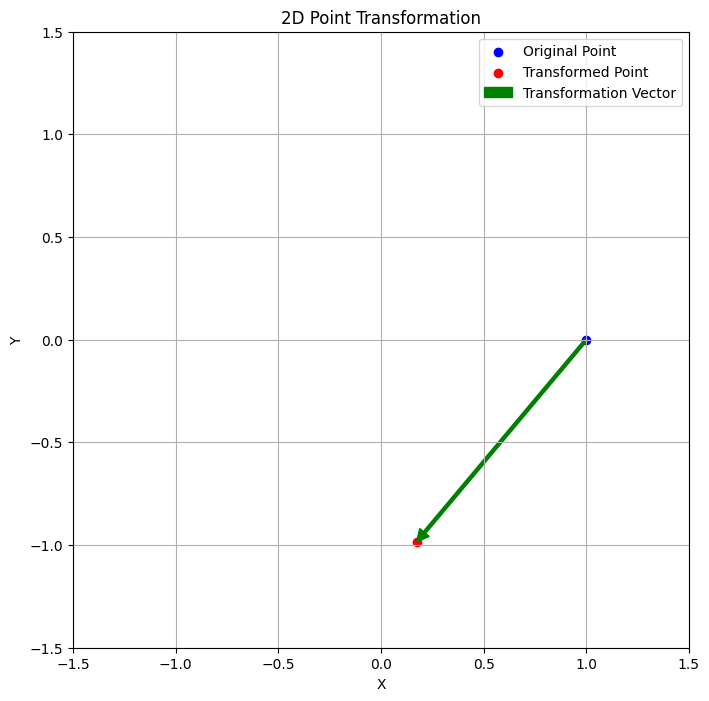

In [20]:
#Rotate the point
point = np.array([1,0])
rotation = rotate_2d(-80)
new_point = rotation @ point
visualize_transformation(point, new_point)

#Code for Exercises

In [21]:
def generate_star(center=(0, 0), num_points=5, outer_radius=1, inner_radius=0.5,homogeneous=False):
    '''
    This function generates the coordinates of a star shape based on the specified number of points,
    outer radius, inner radius, and center coordinates. The star is created by alternating between the
    outer and inner radii at calculated angles, resulting in a visually appealing star pattern.
    '''
    angles = np.linspace(np.pi/2, 5*np.pi/2, num_points*2, endpoint=False)
    radii = np.array([outer_radius, inner_radius] * num_points)
    x = radii * np.cos(angles) + center[0]
    y = radii * np.sin(angles) + center[1]
    return np.column_stack((x, y)) if not homogeneous else np.column_stack((x, y, np.ones(num_points*2)))

def plot_star(ax, star, title,global_view):
    ax.plot(star[:, 0], star[:, 1], 'b-')
    ax.plot([star[-1, 0], star[0, 0]], [star[-1, 1], star[0, 1]], 'b-')  # Connect last to first
    ax.set_title(title)
    ax.axis('equal')
    if global_view:
      ax.set_xlim(-10,10)
      ax.set_ylim(-10,10)
      ax.axhline(0, color='black')
      ax.axvline(0, color='black')

    ax.grid(True)  # Add grid

    star_center = np.mean(star, axis=0)
    arrow_start = star_center

    vector_to_point = star[0] - star_center
    direction = vector_to_point/np.linalg.norm(vector_to_point)  # Normalize the direction vector
    arrow_length = np.linalg.norm(vector_to_point)/2
    arrow_end = star_center + (arrow_length) * direction
    headwidth=6 if global_view else 8
    width = 1 if global_view else 2
    ###########################################
    ax.annotate('', xy=arrow_end, xytext=arrow_start,
                arrowprops=dict(facecolor='green', shrink=0.05, width=width, headwidth=headwidth))

def plot_stars(stars,global_view=False):
    if len(stars) == 1 or not isinstance(stars, list):
        print("There must be a list of multiple stars to plot")
        return
    num_stars = len(stars)
    fig, axs = plt.subplots(1, num_stars, figsize=(10, 5))
    for i, star in enumerate(stars):
        plot_star(axs[i], star[:,:2], f'Star {i+1}',global_view)

## Exercise: Rotate a star
In this exercise, we'll apply our knowledge of matrix transformations to rotate a star shape. This exercise demonstrates how rotation matrices can be used to manipulate geometric objects, which is a fundamental concept in medical imaging and computer graphics for biomedical applications.

Objectives:
1. Implement a rotation function using a 2D rotation matrix that rotates the star 135 degrees in the counterclockwise direction
2. Visualize the original and rotated star


star_points shape: (10, 2)
rotation marix shape: (2, 2)
matrix multiplication shape: (2, 2) (2, 10)
resulting matrix shape: (2, 10)
resulting matrix transpose shape: (10, 2)


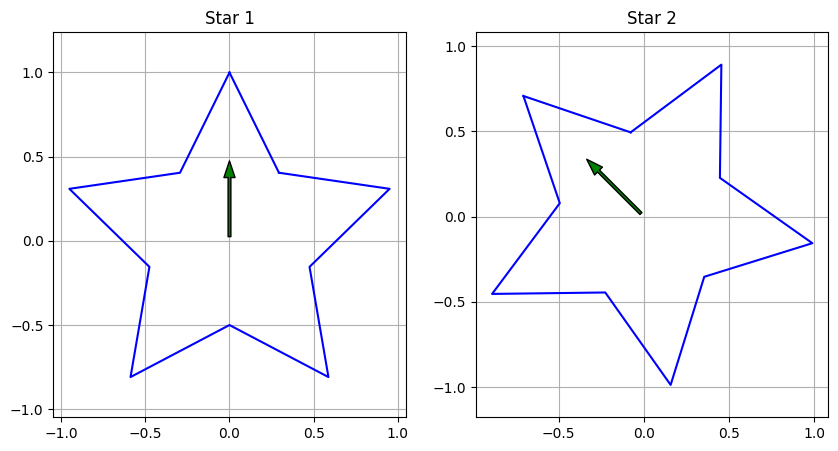

In [23]:
def rotate_variables(star_points, angle_degrees):
    """
    This function rotates an object defined as a set of vertices.
    """
    rotation = rotate_2d(angle_degrees)
    print('star_points shape:', np.shape(star_points))
    print('rotation marix shape:', np.shape(rotation))
    print('matrix multiplication shape:', np.shape(rotation), np.shape(star_points.T))
    print('resulting matrix shape:', np.shape(rotation @ star_points.T))
    print('resulting matrix transpose shape:', np.shape((rotation @ star_points.T).T))
    rotated_star = (rotation  @ star_points.T).T
    #rotated_star = star_points.T@rotation

    return rotated_star


star = generate_star(center=(0,0))

rotated_star = rotate_variables(star,45)

plot_stars([star,rotated_star])

## Exercise: Translate a star
In this exercise, we'll apply our knowledge of matrix transformations to rotate a star shape. This exercise demonstrates how rotation matrices can be used to manipulate geometric objects, which is a fundamental concept in medical imaging and computer graphics for biomedical applications.

Objectives:
1. Generate a star centered at (1,2)
2. Translate the star 2 units to the left
3. Visualize the original and translated star


In [27]:
def translate(tx, ty):
  return np.array([
      [1, 0, tx],
      [0, 1, ty],
      [0, 0, 1]
  ])

def translate_vertices(star_points, tx, ty):
    """This function translates an object"""
    translation = translate(star_points)
    translated_vertices=(translation @ star_points.T).T

    return translated_vertices[:,:2]


star = generate_star(center=(1,2), homogeneous=True)

translated_star=translate_vertices(star,2,0)

plot_stars( [star,translated_star])


TypeError: translate() missing 1 required positional argument: 'ty'

## Exercise: Rotate and Scale a star
Objectives:
1. Generate a start centered at (2,2)
2. Implement a function to rotate a star shape 45 degrees in the clockwise direction.
3. Implement a function to increase the scale of the star by 2.
4. Visualize the original and transformed star shapes.


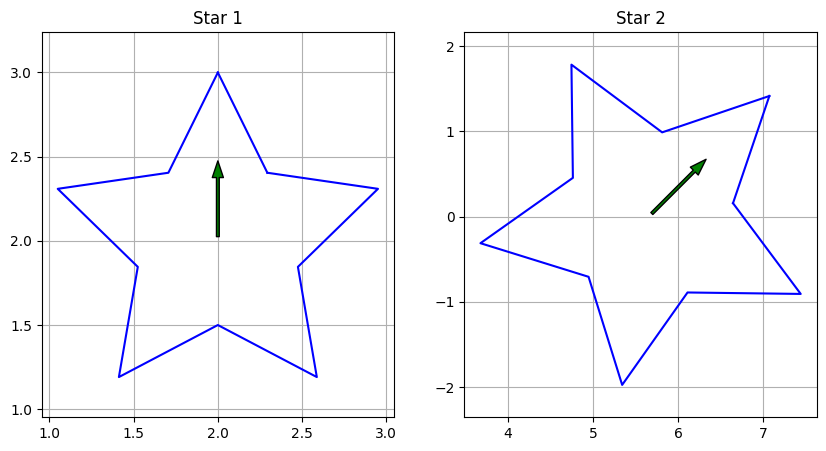

In [ ]:
def transform_vertices(vertices, rotation,scale):
    """This function translates an object"""
    rotation=rotate_2d(rotation)
    scaling=scale_2d(*scale)


    rotated_star=(rotation @ vertices.T).T

    rotated_scaled_star=(scaling @ rotated_star.T).T

    return rotated_scaled_star


star = generate_star(center=(2,2))

transformed_star=transform_vertices(star,-45,[2,2])

plot_stars( [star,transformed_star])


# Using Homogeneous Coordinates to Represent Transformation Matrices

* Homogeneous coordinates are a way of representing N-dimensional coordinates with N+1 numbers

$$p=\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$$

* In standard 2D Cartesian coordinates, a point is represented as
(x,y). However, transformations like translation are difficult to express as matrix multiplication in these coordinates. To overcome this, we convert the 2D coordinates into homogeneous coordinates, which add an extra dimension.

* The third coordinate (usually set to 1) allows us to represent translation, rotation, and scaling as matrix operations, which can be applied to represent **all** transformations as matrix multiplications.



## Transformation Matrices in Homogeneous Coordinates
<center><img  src="https://github.com/uf-bme/bme3053c/raw/main/files/2D_affine_transformation_matrix.svg" alt='Matrix Transformations'/></center>

# Combining Transformations

When performing multiple transformations, we can combine them by multiplying their matrices. When working with transformation matrices, especially in applications like biomedical engineering where precision is crucial, it's important to be mindful of several key considerations to ensure accurate and effective results.

* **Order of Transformations Matters**
  * **Non-Commutative Multiplication**: Matrix multiplication is **not commutative**, meaning that $( A \cdot B \neq B \cdot A )$. The sequence in which you multiply transformation matrices directly affects the final result.
  * **Sequence of Operations**: Decide on the logical sequence of transformations (e.g., scaling, then rotation, then translation) based on the specific requirements of your application.

* **Coordinate Systems and Reference Frames**
  * **Consistency**: Ensure that all transformations are applied within the same coordinate system. Mixing coordinate systems can lead to incorrect transformations.
  * **Local vs Global Transformations**: Understand whether transformations are relative to the object's local coordinate system or a global coordinate system. This affects how transformations are applied and combined.

* **Use of Homogeneous Coordinates**
  * **Unified Representation**: Homogeneous coordinates allow for a consistent representation of translation, rotation, and scaling as matrix operations.
  * **Additional Dimension**: Remember to convert points to homogeneous coordinates by adding an extra dimension (e.g., $( (x, y) $) becomes $( (x, y, 1) $) in 2D) before applying transformation matrices.


### Example: Rotation + Scaling + Translation
We can also combine rotation, scaling, and translation in one step by multiplying their respective matrices together:


$$Combined=T⋅S⋅R(θ)$$

This order applies the rotation first, then scaling, and finally translation.

In [ ]:
def rotate(angle_degrees):
    angle_radians = np.radians(angle_degrees)
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)
    return np.array([
        [cos_theta, -sin_theta,0],
        [sin_theta, cos_theta,0],
        [0,0,1],
    ])


def scale(sx,sy):
    return np.array([
        [sx, 0,0],
        [0, sy,0],
        [0,0,1],
    ])


## Exercise: Combine transformation matrices to rotate and scale a star
Objectives:
1. Generate a start centered at (0,0)
2. Implement a function to rotate a star shape 60 degrees in the counterclockwise direction.
3. Implement a function to increase the scale of the star by 3.
4. Visualize the original and transformed star shapes.


In [ ]:
# Fix the `combined_transform` line
star=generate_star(homogeneous=True)

combined_transform =  ""

transformed_star = (combined_transform @ star.T).T

plot_stars([star,transformed_star])


## Exercise: Combine transformation matrices to aquire stars described below
Objectives:
1. Generate a start centered at (0,0)
2. Implement a combine transformation matrix that will result in a star that is centered at (3,3), rotated counterclockwise by 90 degrees, and scaled by 2.
4. Visualize the original and transformed star shapes with global_view = True in `plot_stars`.



In [ ]:
#Complete the exercise below


## Exercise: Combine transformation matrices to aquire stars described below
Objectives:
1. Generate a start centered at (2,2)
2. Implement a combine transformation matrix that will result in a star that is centered at (-1,1), scaled by 0.5, and rotated clockwise by 45 degrees.



In [ ]:
#Complete the exercise below


# Conclusion

In this lesson, we've explored matrix transformations and discussed some of their applications in biomedical engineering. As you continue your studies, you'll encounter many more applications of matrix transformations in areas such as signal processing, medical robotics, and computational modeling of biological systems.
